In [12]:
%matplotlib inline

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import torchaudio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch Version: ",torch.__version__)
print("Torchaudio Version: ",torchaudio.__version__)

PyTorch Version:  1.5.1+cu92
Torchaudio Version:  0.5.1


Shape of waveform: torch.Size([2, 4240656])
Sample rate of waveform: 44100


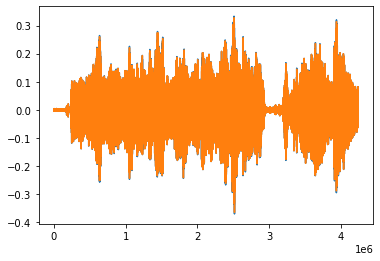

In [14]:
waveform, sample_rate = torchaudio.load('P1_10_audio.wav')

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

In [19]:
# checking transforms
# load audio file
sound = torchaudio.load('P1_10_audio.wav', out = None, normalization = True)
#load returns a tensor with the sound data and the sampling frequency (44.1kHz for UrbanSound8K)
soundData = torch.mean(sound[0], dim=0, keepdim=True)
#downsample the audio to ~8kHz
tempData = torch.zeros([160000, 1]) #tempData accounts for audio clips that are too short
if soundData.numel() < 160000:
    tempData[:soundData.numel()] = soundData[:]
else:
    tempData[:] = soundData[:160000]

soundData = tempData
soundFormatted = torch.zeros([32000, 1])
soundFormatted[:32000] = soundData[::5] #take every fifth sample of soundData
soundFormatted = soundFormatted.permute(1, 0)
soundFormatted = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

return soundFormatted, self.arous_labels[index], self.valence_labels[index]

RuntimeError: The expanded size of the tensor (1) must match the existing size (4240656) at non-singleton dimension 1.  Target sizes: [160000, 1].  Tensor sizes: [4240656]